In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'2.6.0+cu124'

In [ ]:
weight = 0.7
bias = 0.4
start = 0
end = 4
step = 0.1
X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight * X + bias

In [ ]:
X[:10], Y[:10], len(Y)

(tensor([[0.0000],
         [0.1000],
         [0.2000],
         [0.3000],
         [0.4000],
         [0.5000],
         [0.6000],
         [0.7000],
         [0.8000],
         [0.9000]]),
 tensor([[0.4000],
         [0.4700],
         [0.5400],
         [0.6100],
         [0.6800],
         [0.7500],
         [0.8200],
         [0.8900],
         [0.9600],
         [1.0300]]),
 40)

In [ ]:
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]

In [ ]:
def plot_predictions( train_data=X_train,
                     train_labels=Y_train,
                      test_data=X_test,
                      test_labels=Y_test,
                      predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="train")
  plt.scatter(test_data, test_labels, c="g", s=4, label="test")
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="pred")

  plt.legend(prop={"size": 14})

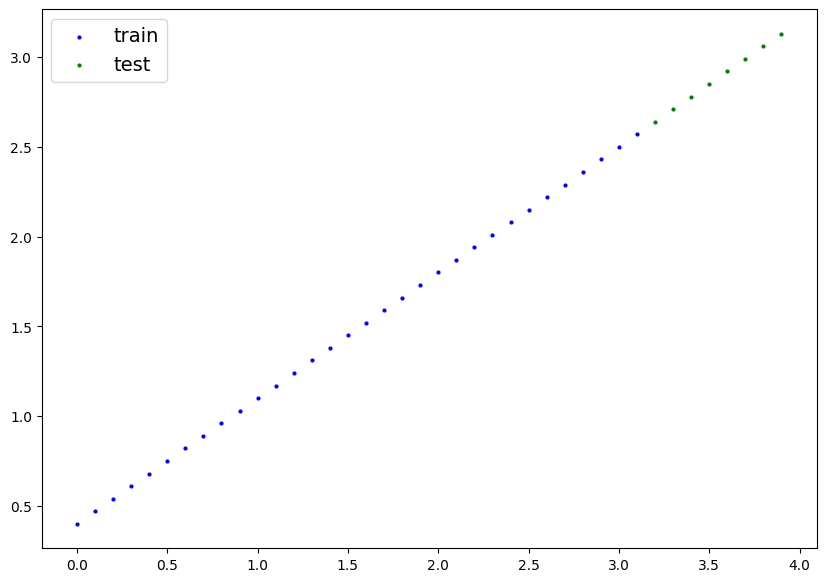

In [ ]:
plot_predictions()

In [ ]:
class LinearRegressionModel(nn.Module):  #everything inherits from it in NNs
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         dtype=torch.float))
  def forward(self, x: torch.Tensor) ->torch.Tensor:
    return self.weights*x + self.bias

torch.nn.Parameter
torch.nn.Module
torch.optim

In [ ]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()
model_0
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
X_test, Y_test

(tensor([[3.2000],
         [3.3000],
         [3.4000],
         [3.5000],
         [3.6000],
         [3.7000],
         [3.8000],
         [3.9000]]),
 tensor([[2.6400],
         [2.7100],
         [2.7800],
         [2.8500],
         [2.9200],
         [2.9900],
         [3.0600],
         [3.1300]]))

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[1.2062],
        [1.2399],
        [1.2736],
        [1.3072],
        [1.3409],
        [1.3746],
        [1.4082],
        [1.4419]])

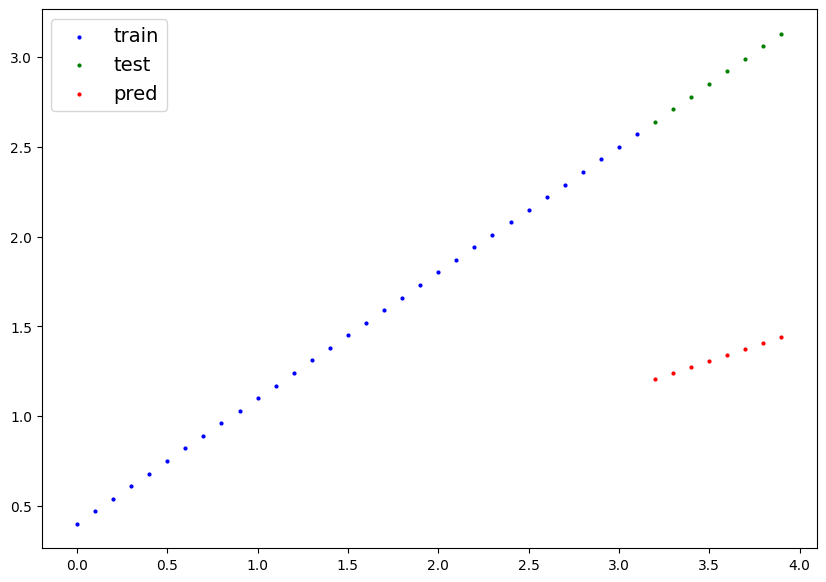

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
#set up a loss function
loss_fn = nn.L1Loss()

#set up an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.001) #learning rate



In [ ]:
#training loop
#forward pass, then calculate the loss, optimize , loss backward, optimizer step
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  model_0.train()

  #forward pass
  y_pred = model_0(X_train)

  #loss calculation
  loss = loss_fn(y_pred, Y_train)
  #print(f"Loss:{loss}")

  #optimizer zero grad
  optimizer.zero_grad()

  #back propagation
  loss.backward()

  #step optimizer
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, Y_test)
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)

      print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
      print(model_0.state_dict())

Epoch: 0 | Loss: 0.8343205451965332 | Test Loss: 1.5544373989105225
OrderedDict([('weights', tensor([0.3382])), ('bias', tensor([0.1298]))])
Epoch: 10 | Loss: 0.8002956509590149 | Test Loss: 1.489412784576416
OrderedDict([('weights', tensor([0.3537])), ('bias', tensor([0.1398]))])
Epoch: 20 | Loss: 0.7662708163261414 | Test Loss: 1.4243881702423096
OrderedDict([('weights', tensor([0.3692])), ('bias', tensor([0.1498]))])
Epoch: 30 | Loss: 0.7322459816932678 | Test Loss: 1.3593635559082031
OrderedDict([('weights', tensor([0.3847])), ('bias', tensor([0.1598]))])
Epoch: 40 | Loss: 0.6982210874557495 | Test Loss: 1.2943389415740967
OrderedDict([('weights', tensor([0.4002])), ('bias', tensor([0.1698]))])
Epoch: 50 | Loss: 0.664196252822876 | Test Loss: 1.2293142080307007
OrderedDict([('weights', tensor([0.4157])), ('bias', tensor([0.1798]))])
Epoch: 60 | Loss: 0.6301714777946472 | Test Loss: 1.1642897129058838
OrderedDict([('weights', tensor([0.4312])), ('bias', tensor([0.1898]))])
Epoch: 70

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

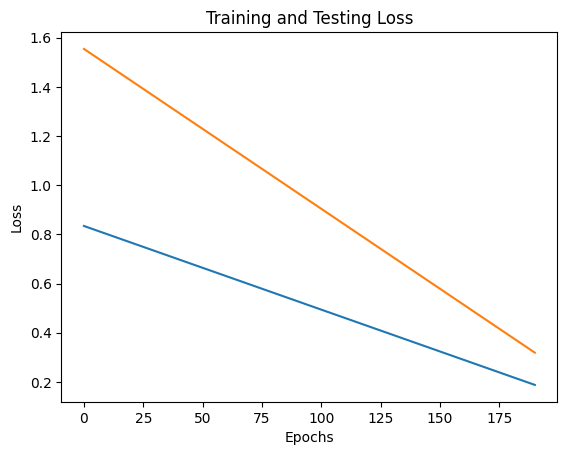

In [ ]:
import numpy as np

plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()), label="train loss")
plt.plot(epoch_count, test_loss_values, label="test loss")
plt.title("Training and Testing Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

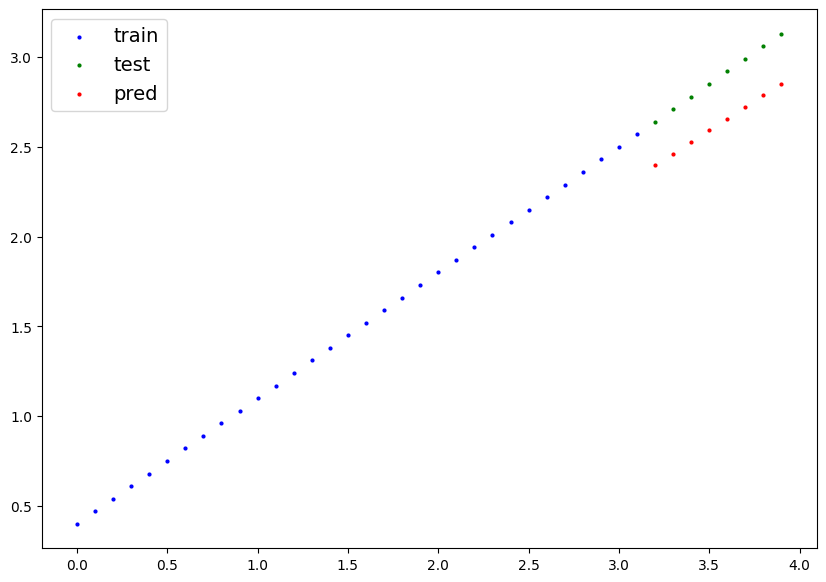

In [ ]:
plot_predictions(predictions=y_preds_new)

How to save models
*   torch.save()
*   torch.load()
*   torch.nn.Module.load_state_dict()



In [ ]:
#saving our model
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "1_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1674 Jul 22 01:22 1_pytorch_workflow_model_0.pth


In [ ]:
#Loading model
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6467])), ('bias', tensor([0.3288]))])

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"using device: {device}")


using device: cuda


In [ ]:
weight = 20
bias = 2

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight * X + bias


In [ ]:
train_split = int(0.8* len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]


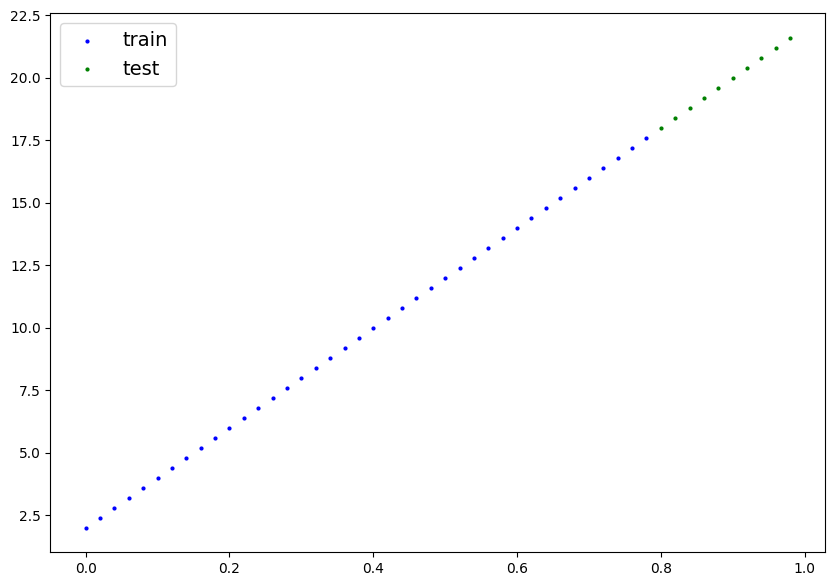

In [ ]:
plot_predictions(X_train, Y_train, X_test, Y_test)

In [ ]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)


In [ ]:
epochs = 200

for epoch in range(epoch):
  model_1.train()

  y_pred = model_1(X_train)

  loss = loss_fn(y_pred, Y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, Y_test)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
    print(model_1.state_dict())


Epoch: 0 | Loss: 0.9030594825744629 | Test Loss: 0.549106240272522
OrderedDict([('linear_layer.weight', tensor([[19.3999]])), ('linear_layer.bias', tensor([1.9850]))])
Epoch: 10 | Loss: 0.9030594825744629 | Test Loss: 0.549106240272522
OrderedDict([('linear_layer.weight', tensor([[19.3999]])), ('linear_layer.bias', tensor([1.9850]))])
Epoch: 20 | Loss: 0.9030594825744629 | Test Loss: 0.549106240272522
OrderedDict([('linear_layer.weight', tensor([[19.3999]])), ('linear_layer.bias', tensor([1.9850]))])
Epoch: 30 | Loss: 0.9030594825744629 | Test Loss: 0.549106240272522
OrderedDict([('linear_layer.weight', tensor([[19.3999]])), ('linear_layer.bias', tensor([1.9850]))])
Epoch: 40 | Loss: 0.9030594825744629 | Test Loss: 0.549106240272522
OrderedDict([('linear_layer.weight', tensor([[19.3999]])), ('linear_layer.bias', tensor([1.9850]))])
Epoch: 50 | Loss: 0.9030594825744629 | Test Loss: 0.549106240272522
OrderedDict([('linear_layer.weight', tensor([[19.3999]])), ('linear_layer.bias', tensor(

In [ ]:
model_1.eval()
with torch.inference_mode():
  y_pred = model_1(X_test)


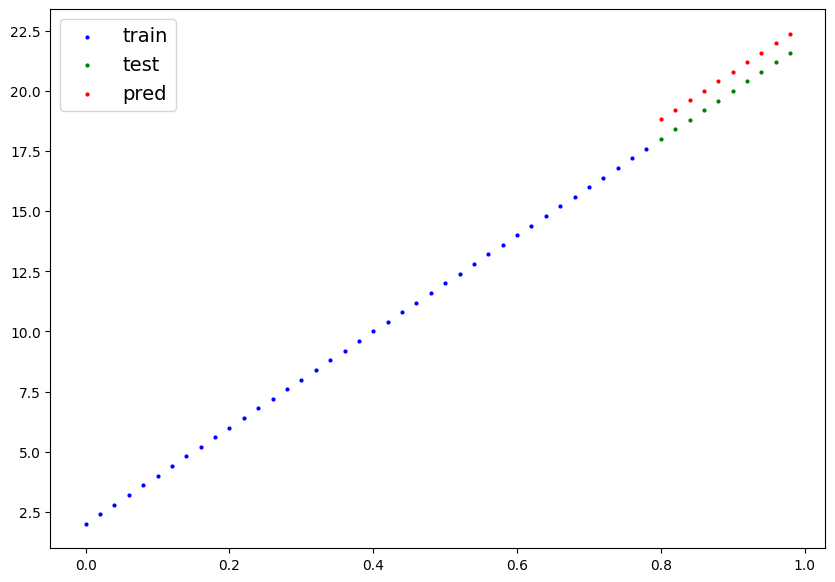

In [ ]:

plot_predictions(X_train, Y_train, X_test, Y_test, predictions=y_pred)

In [ ]:
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "2_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

In [ ]:
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>